Loading libraries needed for this code:

In [45]:
library(car)
library(lmtest)
library(MASS)
library(ALSM)
library(leaps)
library(caret)

Loading required package: ggplot2

Loading required package: lattice


Attaching package: 'lattice'


The following object is masked from 'package:ALSM':

    oneway




I read the csv file into the variable per_game. However, there are N/A values in this dataset. These N/A values typically occur in the percentages columns when the attempted number is 0, since it would not make sense to divide by 0. I decided to drop the rows with N/A values since it indicates that those type of shots were not even made. As a result, I created a new dataframe called per_game2 that has all of the rows from the per_gama dataset except for the ones with N/A values. I used the per_game2 dataset for the rest of the code. The per_game2 dataset has 144 rows.

In [51]:
per_game <- read.csv("./per_game_combined.csv")
per_game2 <- per_game [!is.na(per_game$FT.) & !is.na(per_game$X2P.) & !is.na(per_game$X3P.),]
nrow(per_game2)
colnames(per_game2)

[1] 144

[1] "Player.Name" "Season"      "Age"         "Team"        "Lg"         
 [6] "Pos"         "G"           "GS"          "MP"          "FG"         
[11] "FGA"         "FG."         "X3P"         "X3PA"        "X3P."       
[16] "X2P"         "X2PA"        "X2P."        "eFG."        "FT"         
[21] "FTA"         "FT."         "ORB"         "DRB"         "TRB"        
[26] "AST"         "STL"         "BLK"         "TOV"         "PF"         
[31] "PTS"         "Awards"

# Research Question 2

I created a subset containing the variables I am using: FT., X2P., X3P., TOV, and my response variables PTS. I only use this subset to plot my scatterplot matrix and to calculate the correlation matrix. For the rest of the code, I either use my model (which will be created later) or reference the columns from the dataset directly. I plotted the scatterplot matrix. None of the predictor variables seem to correlated with each other, which is a good sign that there is not multicollinearity between them. TOV seems to have a linear relationship with PTS, but FT%, 2P%, 3P% don’t seem to have a strong linear relationship with PTS but there do not seem to be any curved relationships (ex: quadratic, exponential, etc), an indication there may not be linearity issues.


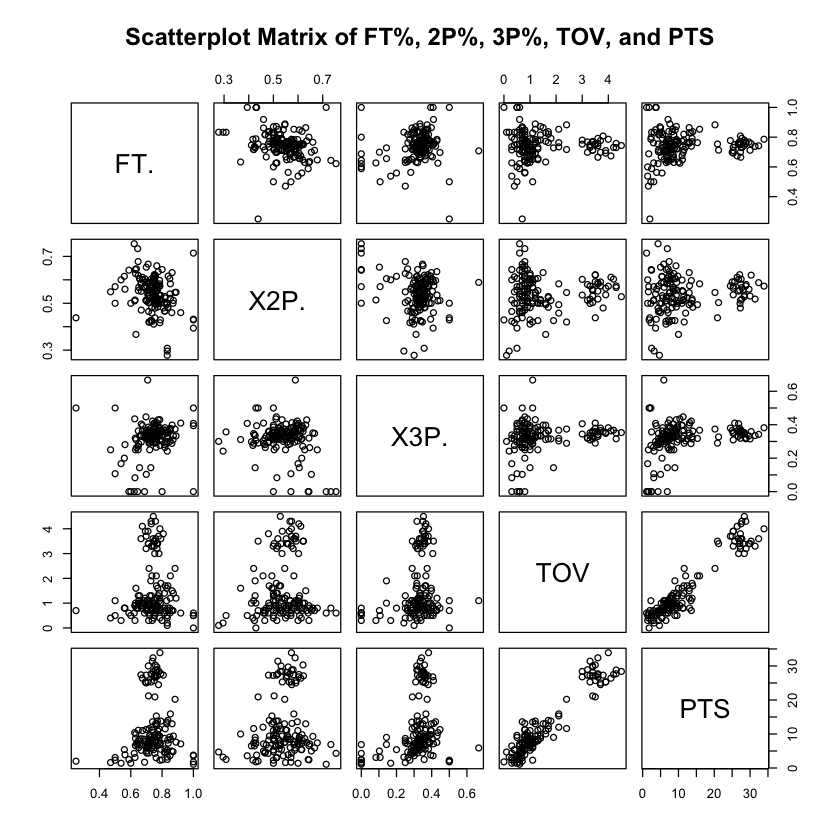

In [6]:
my_subset <- per_game2[, c("FT.", "X2P.", "X3P.", "TOV", "PTS")]
par(bg = 'white')
plot(my_subset, main = "Scatterplot Matrix of FT%, 2P%, 3P%, TOV, and PTS")

I calculated the correlation between every possible pair of predictors (as well as between my predictors and response variable) by using the my_subset variable I created earlier. Since all of the correlation values between the predictors is quite low, with the highest correlation magnitude being 0.23401, which also indicates that there may be low multicollinearity between variables (which will be explored further later). 

In [8]:
cor(my_subset)

,FT.,X2P.,X3P.,TOV,PTS
FT.,1.00000000,-0.2340092,0.1910165,0.02718496,0.08891549
X2P.,-0.23400922,1.0000000,-0.2295132,0.10345446,0.13862878
X3P.,0.19101647,-0.2295132,1.0000000,0.21622169,0.27803588
TOV,0.02718496,0.1034545,0.2162217,1.00000000,0.94999745
PTS,0.08891549,0.1386288,0.2780359,0.94999745,1.00000000


# Full MLR Model

My full model has points per game (PTS) as the response variable and free-throw percentage (FT.), 2-pointer percentage (X2P.), 3-pointer percentage (X3P.), and turnovers (TOV) as the predictors, since my research question is looking at whether FT., X2P., and X3P. have a significant impact on PTS, when accounting for TOV. I created the model (named as model2) and printed the summary of the model. All of the p-values are below the alpha value of 0.05, which is an indication that the true coefficient is different from 0.

In [ ]:
model2 <- lm(PTS ~ FT. + X2P. + X3P. + TOV, per_game2)
summary(model2)


Call:
lm(formula = PTS ~ FT. + X2P. + X3P. + TOV, data = per_game2)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.1933 -1.7432 -0.2461  1.0360  7.3867 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -10.2299     2.6865  -3.808  0.00021 ***
FT.           5.9461     2.3019   2.583  0.01082 *  
X2P.          8.9511     2.9996   2.984  0.00336 ** 
X3P.          7.3866     2.3165   3.189  0.00177 ** 
TOV           6.8920     0.1908  36.114  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.618 on 139 degrees of freedom
Multiple R-squared:  0.9159,	Adjusted R-squared:  0.9135 
F-statistic: 378.5 on 4 and 139 DF,  p-value: < 2.2e-16


# Reduced MLR Model

My null hypothesis is B1 = B2 = B3 = 0. When the full model is Y = B0 + B1*X1 + B2*X2 + B3*X3 + B4*X4 (where X1 = FT., X2 = X2P., X3 = X3P., and X4 = TOV), this null hypothesis makes the reduced model to become Y = B0 + B4*X4. Basically, the reduced model only has the intercept and TOV. Then, I performed an F-Test using the two models. This test yielded a F-statistic of 7.389443 and a p-value of 0.000124959, which is less than the alpha value of 0.05, so we can reject the null hypothesis. Therefore, there is evidence that at least one of the beta values B1, B2, or B3 is not 0, which means that one of predictors has a significant impact on points per game.

In [10]:
model2R <- lm(PTS ~ TOV, per_game2)
anova(model2R, model2)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,142,1104.7746,NA,NA,NA,NA
2,139,952.8154,3,151.9592,7.389443,0.000124959


# Diagnostic Procedure

I plotted the residuals vs predictors plots. The residual plots do not seem to be evenly scattered for FT% and 3P%, so the variance may not be constant.
The 2P% residual plot is a little more evenly scattered than the FT% and the 3P% plots but not completely → potentially non-constant variance.
TOV residual plot is a little more evenly scattered than the FT% and the 3P% plots but not completely → potentially non-constant variance.
None of the plots seem to have strong curvature, so they don't seem to have a different relationship besides linear (like quadratic or exponential). Although, there may not be a strong linear realtionship.

           Test stat Pr(>|Test stat|)  
FT.          -2.4208          0.01679 *
X2P.          0.1073          0.91474  
X3P.         -2.3253          0.02151 *
TOV          -0.1280          0.89837  
Tukey test    0.2882          0.77318  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


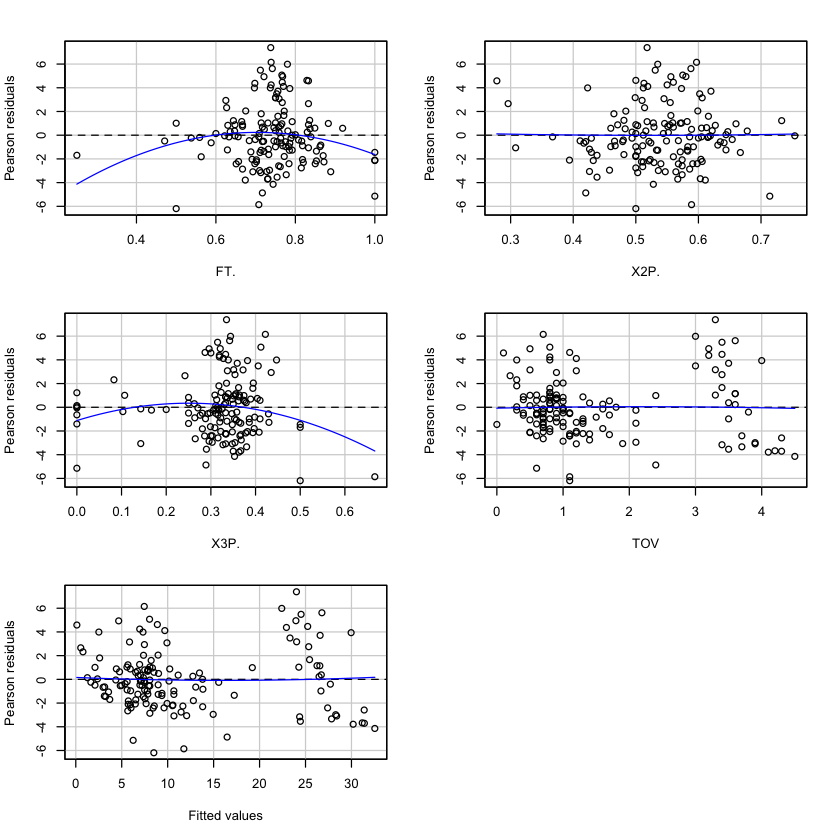

In [14]:
par(bg = 'white')
residualPlots(model2)

I also plotted the fitted values vs residual plot and the QQ plot. There is a little gap in the residual plot, but beside the gap, most of the data seems mostly scattered. However, the points may not be perfectly scatered around 0 (as indicated by the red line), so there may be a constant variance issue. The QQ plot has quite a few points that devaite away from the line and there's a bit of curavature away from the line at the ends. This indicates that the data is not normal.

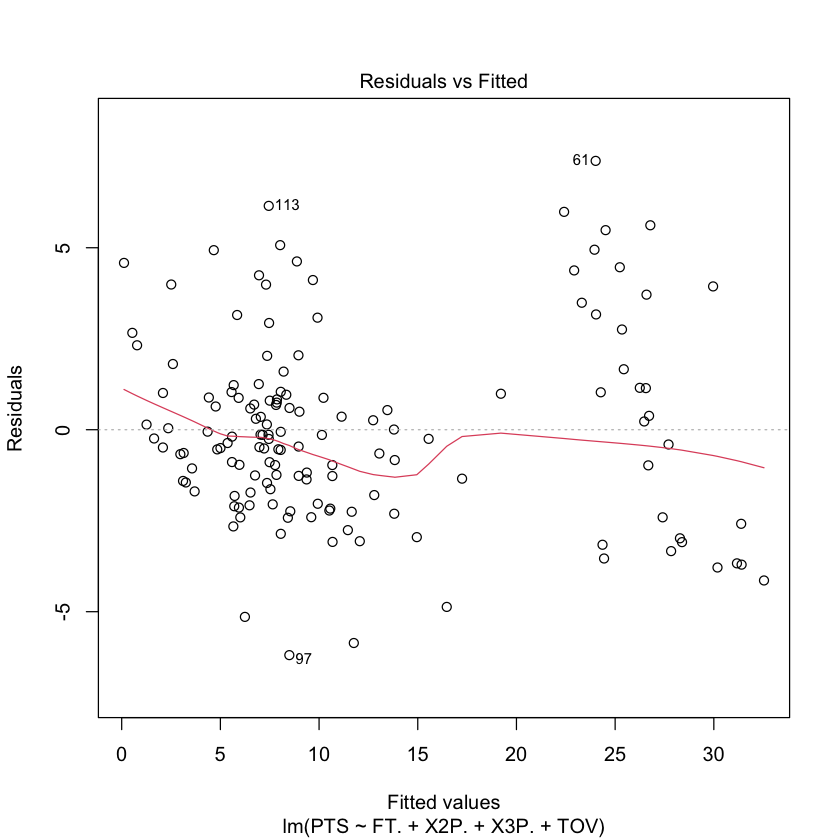

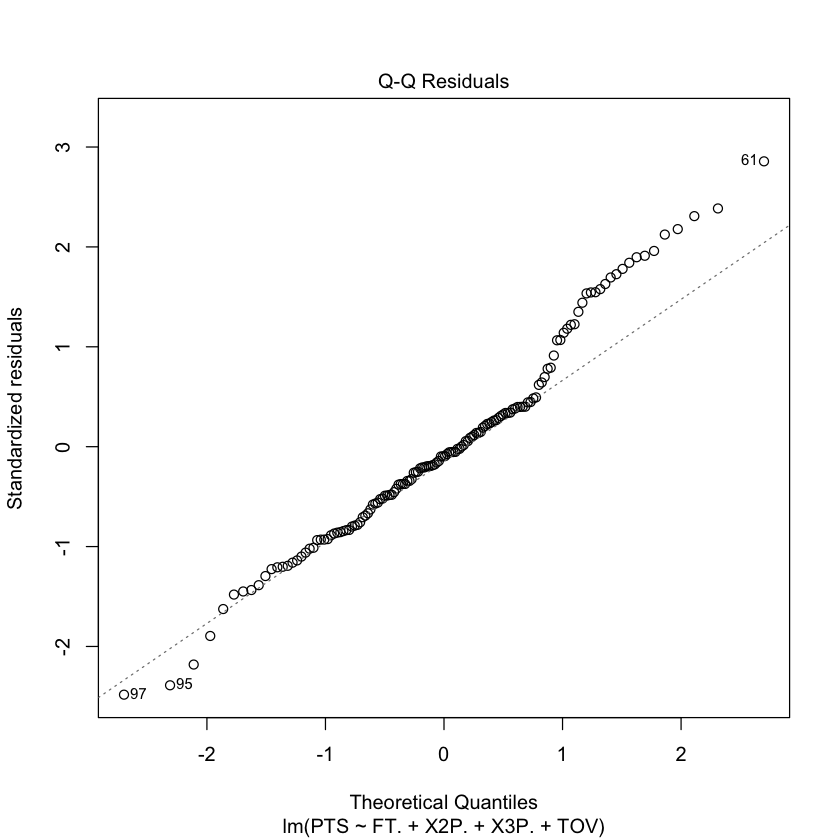

In [20]:
par(bg = 'white')
plot(model2, which=c(1,2))

I performed the Shapiro-Wilks test using the residuals from my model. The null hypothesis of the Shapiro-Wilks test is that the data follows the normal distribution and the alternative hypothesis is that it deviates from the normal distribution. The p-value of the shapiro test is 0.009281, which is smaller than the alpha value of 0.05, so I rejected the null hypothesis. This means the data violates from the normal distribution, so we have non-normal data.

In [21]:
shapiro.test(residuals(model2))


	Shapiro-Wilk normality test

data:  residuals(model2)
W = 0.9748, p-value = 0.009281


I performed the Breusch-Pagan test using my model. The null hypothesis of the Breusch-Pagan test is that the residuals have constant variance, while the alternative hypothesis is that the residuals do not have constant variance. The p-value of the bp test is 0.002365, which is smaller than the alpha value of 0.05, so I rejected the null hypothesis. This means the data violates from the normal distribution, so we have non-constant variance.

In [49]:
bptest(model2)


	studentized Breusch-Pagan test

data:  model2
BP = 16.548, df = 4, p-value = 0.002365


In order to determine outliers and influential points, I used the influencePlot() function which also returns a list of points and their corresponding Studentized Residual values, Hat MAtrix Values, and Cook Distance values. A point is an outlying Y observation if the absolute value of its Studentized Residual value is greater than 2, which is the case with points 61, 95, 97, and 148. A point is an outlying X observation if its Hat Matrix value is larger than a threshold of 2p/n = 2*5/144 = 0.06944, which is the case with points 95, 97, 104, and 148. A point is an influential point if its Cook D value is in a certain percentile. Typically, if the Cook D value is between the 20th percentile and the 50th percentile, that point has some influence (minor to moderate influence). The 20th percentile is 0.46741843, which is larger than all of the Cook D values listed. The largest Cook D value is Point 148's 0.22160216, which is much smaller than the 20th percentile. Therefore, we can conclude that all of the points of minor to no influence, so there are no influential points.

[1] 0.06944444

[1] 0.4674184

,StudRes,Hat,CookD
,<dbl>,<dbl>,<dbl>
61,2.9338610,0.02462660,0.04120986
95,-2.4304518,0.12191116,0.15843153
97,-2.5303879,0.09210415,0.12505077
104,-0.7555177,0.26801858,0.04193022
148,-2.2113073,0.18892642,0.22160216


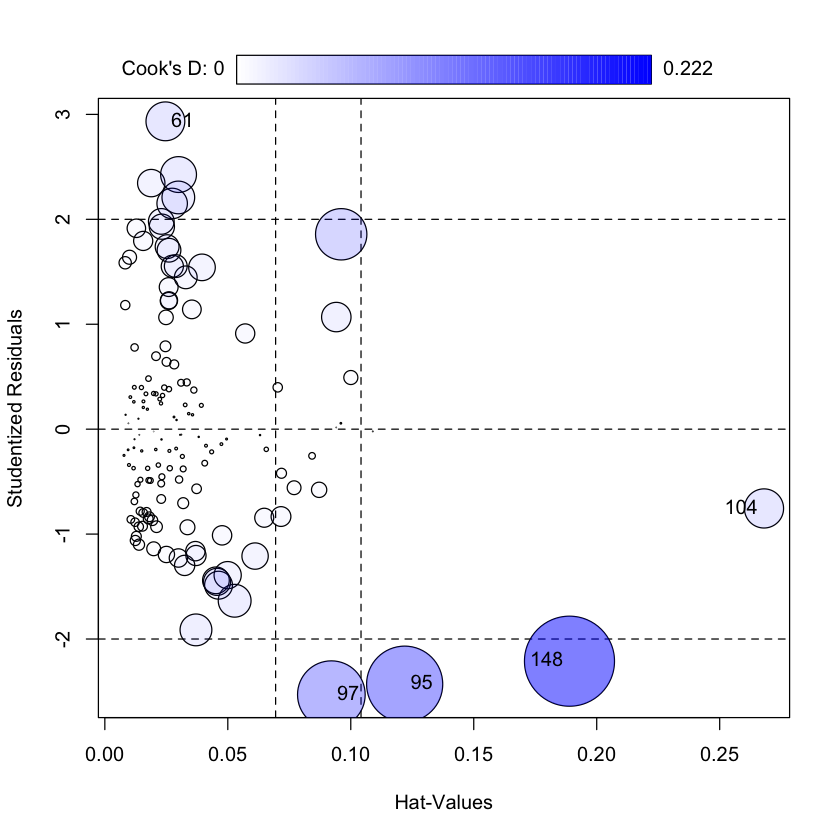

In [59]:
2 * (5 / 144)
qf(0.2, 5, 144 - 5)
par(bg = "white")
influencePlot(model2)

Other measures for influential points include using the dffits() function and the dfbetas() function. When using dffits, if the absolute value is larger than 1, then it may be considered an influential point. Point 148 has a dffit value of -1.06724795144092, but since the absolutel value of this value is not much larger than 1, this point may not be influential enough to consider remedial action.

In [56]:
dffits(model2)

1             2             3             4             5 
-0.0340252037 -0.0699215685  0.0001971465 -0.0106264327 -0.1622605525 
            6             7             8             9            10 
-0.3752493215 -0.0221491668  0.0260737852 -0.0989102015  0.0861951109 
           11            12            13            14            15 
 0.0126465240  0.2677879800 -0.0404249239 -0.0759345680  0.0483764107 
           16            17            18            19            21 
-0.0192548768 -0.1913623614 -0.2222265322 -0.2312731624 -0.1169105875 
           22            24            25            26            27 
 0.3444033365  0.6056533468  0.1996271563  0.1014107125 -0.0672411150 
           28            29            30            31            32 
 0.0117330321  0.0647782065 -0.1135283007 -0.0282102977 -0.0510233506 
           33            34            35            36            37 
 0.0490367362 -0.1786018987 -0.0583766984  0.0334203182 -0.1362189301 
           39            40            41            42            43 
-0.0339858993 -0.0319137198 -0.0613315813 -0.0146519239 -0.1036862596 
           44            45            46            47            48 
-0.2156420906 -0.2264039057 -0.3181574486 -0.3860170913  0.3875824989 
           49            50            51            52            59 
 0.3127292764  0.0790765789  0.1701637410 -0.0326273759 -0.3189670504 
           60            61            62            63            64 
 0.2010426416  0.4661828617  0.2791649976  0.3608938628  0.3252510052 
           65            66            67            68            69 
 0.2803953466  0.0151830842  0.1028682080  0.2210801759  0.0277277861 
           70            71            72            73            74 
-0.2273255201  0.0623763520 -0.3273842877 -0.3133536901  0.0827398780 
           75            76            77            78            79 
-0.2362214877 -0.1743131832  0.2669177740  0.2973599742 -0.0687547921 
           80            82            83            84            85 
-0.2377689077 -0.1019307790 -0.1188727612 -0.1220554253  0.1096086687 
           86            88            89            90            91 
 0.0487566100 -0.0889299734 -0.3085161198 -0.0608033953 -0.0193752403 
           92            93            94            95            96 
 0.0438911088 -0.0031597011  0.0497457216 -0.9056064784 -0.0847170418 
           97            98            99           100           101 
-0.8059511021  0.0197295211 -0.1099926343 -0.1611481360 -0.0771467159 
          102           103           104           105           106 
-0.0509733902 -0.0214696304 -0.4571692836  0.2243814314  0.0052597553 
          107           108           109           110           111 
 0.2258071088  0.1448518378  0.2606743550  0.1650788235  0.1082646517 
          112           113           114           115           116 
 0.2181557253  0.4265755117  0.3034735934 -0.0095261142 -0.0666744459 
          117           118           119           120           121 
-0.0793703184  0.0623975542 -0.0468922755 -0.0255840012 -0.0709064629 
          122           123           124           125           126 
 0.0054419229  0.0252266734  0.1051618853  0.1255276168  0.0312718103 
          127           128           129           130           131 
 0.0439475372 -0.0150188162  0.0284690538  0.0433278943  0.2186561212 
          132           133           134           135           136 
-0.0657194636  0.0375730891 -0.0496863404  0.0424890873  0.0458438339 
          137           138           139           140           141 
-0.0063837268 -0.1118632371 -0.1004946136 -0.1163614607  0.0263472640 
          142           143           144           145           146 
-0.0460744952  0.0722317390 -0.0318142673 -0.0074724442  0.1640706063 
          147           148           151           152           153 
 0.0183357813 -1.0672479514 -0.0146822051 -0.0093181424 -0.0944341445 
          154           155         

When using dfbetas, if the value is larger than 1, then it may be considered influential. However, using this measure, there don't seem to be any values that large, so ther may not be any influential points. Since there don't seem to be any influential points, it will not be neccessary to consider remedial actions that deal with influential points such as Robust Regression.

In [57]:
dfbetas(model2)

,(Intercept),FT.,X2P.,X3P.,TOV
1,-2.468998e-02,1.076397e-02,2.725712e-02,-1.027290e-03,2.951705e-03
2,-4.897076e-02,1.635260e-02,5.729334e-02,3.966435e-03,-7.096853e-04
3,1.569028e-06,7.595718e-05,-5.073592e-05,-4.155097e-05,5.042969e-05
4,-3.449699e-03,-8.017269e-04,5.267311e-03,2.414276e-03,-4.901178e-03
5,-1.025678e-01,2.618303e-02,1.192695e-01,5.082070e-02,-7.022756e-02
6,-2.713484e-01,8.956851e-02,3.052616e-01,1.354121e-01,-1.816546e-01
7,-1.765998e-03,-4.210446e-03,3.913757e-03,3.020945e-03,-4.109251e-03
8,-3.062864e-03,1.377027e-02,-8.472137e-03,1.950536e-03,2.692696e-03
9,4.104905e-02,-5.441581e-02,-8.989506e-03,-2.466889e-02,-3.213205e-03
10,2.231057e-02,1.052761e-02,-3.670275e-02,6.028105e-03,-3.036723e-02


I looked at some indicators of multicollinearity before, but checking VIF values is a better way. All of the VIF values are between 1 and 1.2. Multicollinearity is only an issue when the VIF values are greater than or equal to 10, so there is not multicollinearity issue (and we do not have to consider Ridge Regression).

In [42]:
vif(model2)

FT.     X2P.     X3P.      TOV 
1.081034 1.128555 1.146024 1.077339

# Remedial Procedure - Box-Cox

Since we have a normality issue and a constant variance issue, we need to perform Box-Cox first and see if that resolves the issue. I calculated the lambda value to be 0.6969697 using the log-likelihood method (where the lambda value is the largest log-likelihood value).

[1] 0.6969697

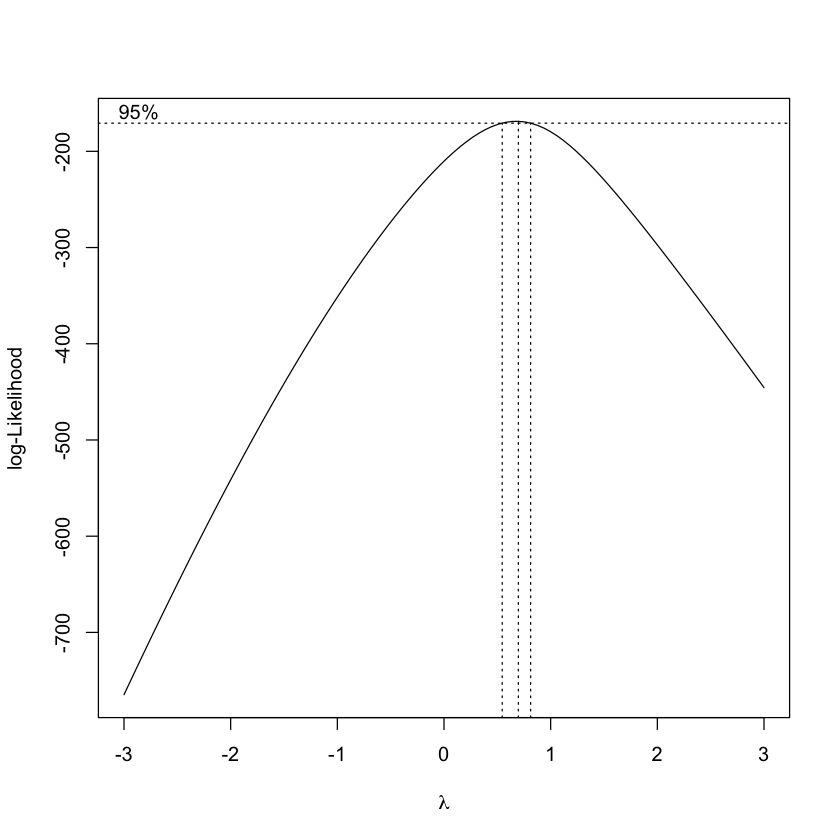

In [27]:
par(bg = "white")
bc <- boxcox(model2, lambda=seq(-3, 3, by=0.1))
lambda <- bc$x[which.max(bc$y)]
lambda

The Box-Cox transformation raises the response variable by the lambda value. So Y (PTS) = Y^0.6969697. I added a column in the per_game2 dataset with the transformed response variable (called PTS_Trans). Then, I printed out the column names of the dataset to make sure the new transformed column was added to the dataset.

In [28]:
per_game2$PTS_Trans <- (per_game2$PTS)^lambda
colnames(per_game2)

[1] "Player.Name" "Season"      "Age"         "Team"        "Lg"         
 [6] "Pos"         "G"           "GS"          "MP"          "FG"         
[11] "FGA"         "FG."         "X3P"         "X3PA"        "X3P."       
[16] "X2P"         "X2PA"        "X2P."        "eFG."        "FT"         
[21] "FTA"         "FT."         "ORB"         "DRB"         "TRB"        
[26] "AST"         "STL"         "BLK"         "TOV"         "PF"         
[31] "PTS"         "Awards"      "PTS_Trans"

I created a new model using the transformed response variable but the same predictor variables. Again, all of the predictors have p-values smaller than 0.05, indicating they are significant

In [ ]:
model2Trans <- lm(PTS_Trans ~ FT. + X2P. + X3P. + TOV, per_game2)
summary(model2Trans)
anova(model2Trans)


Call:
lm(formula = PTS_Trans ~ FT. + X2P. + X3P. + TOV, data = per_game2)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.56380 -0.60099 -0.00787  0.42893  2.08500 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.43571    0.89656  -2.717  0.00743 ** 
FT.          2.18136    0.76822   2.839  0.00520 ** 
X2P.         3.33645    1.00105   3.333  0.00110 ** 
X3P.         3.37499    0.77309   4.366 2.46e-05 ***
TOV          2.12733    0.06369  33.401  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8738 on 139 degrees of freedom
Multiple R-squared:  0.9059,	Adjusted R-squared:  0.9032 
F-statistic: 334.7 on 4 and 139 DF,  p-value: < 2.2e-16


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
FT.,1,11.96587,11.9658661,15.67310,1.196687e-04
X2P.,1,31.95866,31.9586642,41.86001,1.555790e-09
X3P.,1,126.47237,126.4723735,165.65570,1.880126e-25
TOV,1,851.75579,851.7557881,1115.64446,2.799677e-68
Residuals,139,106.12167,0.7634653,NA,NA


I created my reduced model, which only contains TOV and compared the two models uisng the anova() function. My null hypothesis is B1 = B2 = B3 = 0. I performed an F-Test using the two models. This test yielded a F-statistic of 11.25135 and a p-value of 1.179416e-06, which is less than the alpha value of 0.05, so we can reject the null hypothesis. Therefore, there is evidence that at least one of the beta values B1, B2, or B3 is not 0, which means that one of predictors has a significant impact on points per game. This tells us that shooting skill matters for points per game, our performance metric.

In [ ]:
model2TransR <- lm(PTS_Trans ~ TOV, per_game2)
anova(model2TransR, model2Trans)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,142,131.8917,NA,NA,NA,NA
2,139,106.1217,3,25.77005,11.25135,1.179416e-06


I plotted the residual vs predictor plots. Looking at the plots as a whole, they don't look much different from the original ones, which may be an indication that the non-constant varianve issue was not resolved.

           Test stat Pr(>|Test stat|)    
FT.          -4.1581        5.607e-05 ***
X2P.         -0.2781        0.7813265    
X3P.         -3.5583        0.0005123 ***
TOV          -2.1207        0.0357385 *  
Tukey test   -1.8213        0.0685627 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


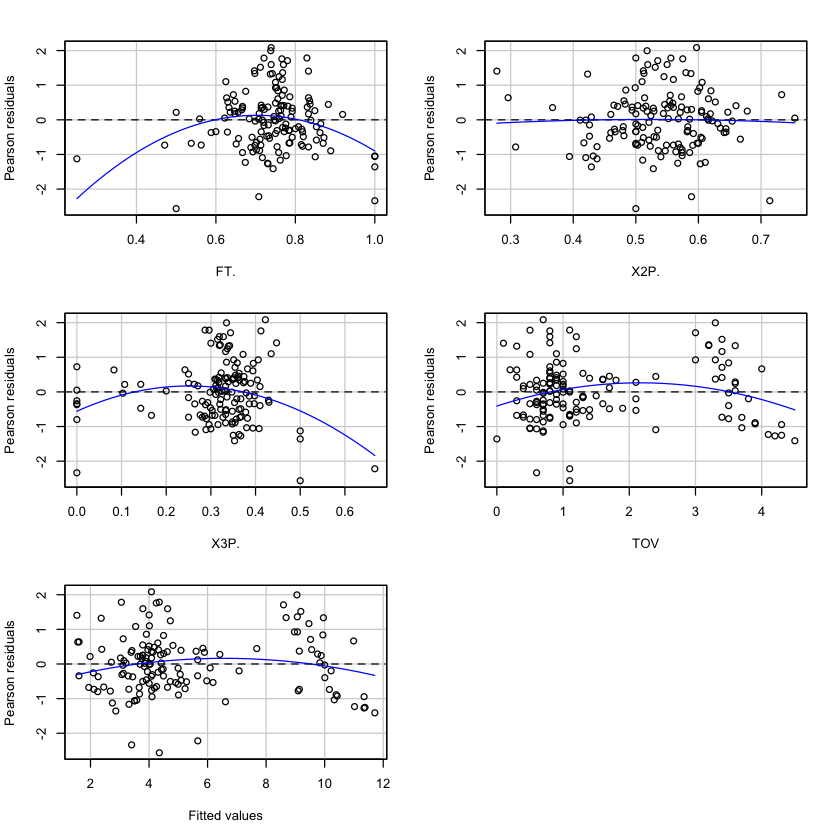

In [32]:
par(bg = "white")
residualPlots(model2Trans)

However, looking at the Residuals vs Fitted values plot, this plot lookss better than the original plot. The data is a little more centered around 0, as indicated by the red line. The QQ plot still has some deviation away from the line, but there is less deviation than the original QQ plot. There may still be a normality issue. However, we cannot conclude non-constant variance issues and normality issues until we perform the Shapiro and BP tests.

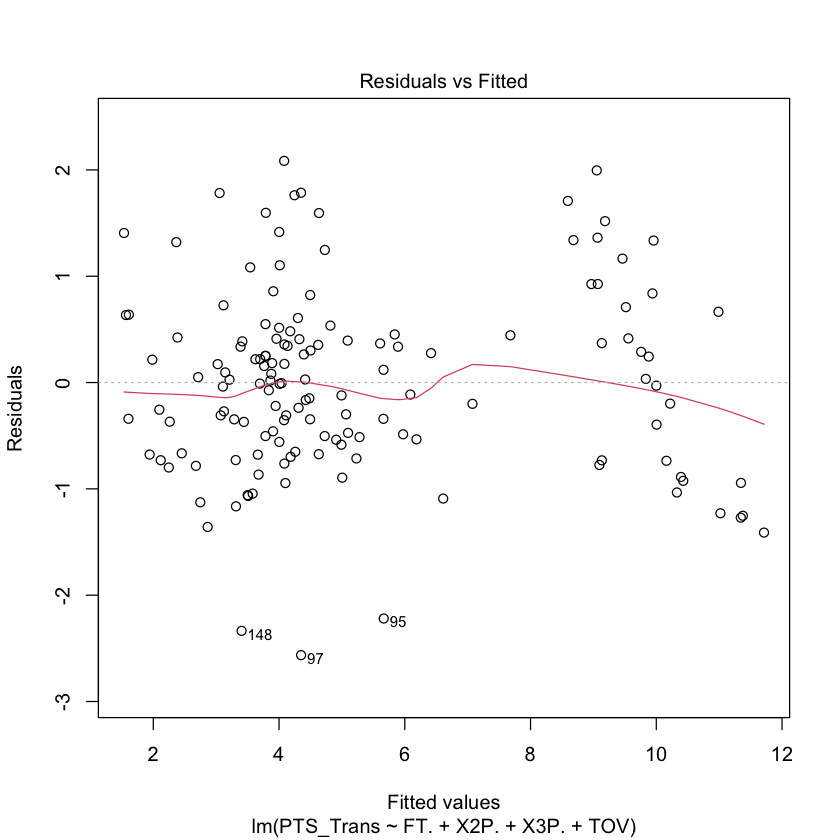

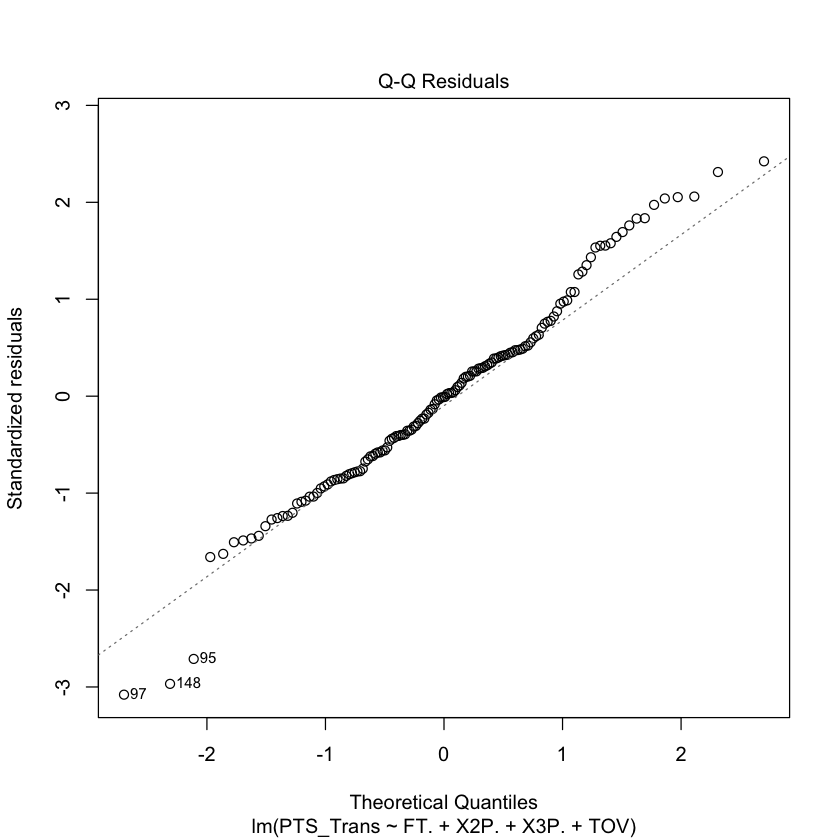

In [33]:
par(bg = "white")
plot(model2Trans, c(1,2))

I performed the Shapiro-Wilks test and it yielded a p-value of 0.09773, which is larger than 0.05, so we fail to reject the null hypothesis. The null hypothesis is that the the data follows a normal distribution. Since we fail to reject the null hypothesis, we can conclude that the data follows a normal distribution and the Box-Cox transformation fixed the normality issue.

In [34]:
shapiro.test(residuals(model2Trans))


	Shapiro-Wilk normality test

data:  residuals(model2Trans)
W = 0.98423, p-value = 0.09773


I performed the Breusch-Pagan test and it yielded a p-value of 0.1817, which is larger than 0.05, so we fail to reject the null hypothesis. The null hypothesis is that the the residuals have constant variance. Since we fail to reject the null hypothesis, we can conclude that the residuals have constant variance and the Box-Cox transformation fixed the constant variance issue.

In [35]:
bptest(model2Trans)


	studentized Breusch-Pagan test

data:  model2Trans
BP = 6.2427, df = 4, p-value = 0.1817


Next, I will figure out the best subset of predictors. However, the BestSub() function typically takes in column numbers for the predictors, so printed the head of each of the predictor's columns to make sure I am referencing the correct columns.

In [38]:
head(per_game2[,c(22, 18, 15, 29)])

,FT.,X2P.,X3P.,TOV
,<dbl>,<dbl>,<dbl>,<dbl>
1,0.717,0.420,0.347,1.1
2,0.732,0.426,0.336,1.3
3,0.792,0.512,0.315,1.8
4,0.763,0.494,0.318,2.1
5,0.735,0.458,0.303,2.1
6,0.717,0.420,0.289,2.4


I used the BestSub() function to figure out the best subset of predictors for my model. The best subset is the row with the lowest SSEp, AICp, SBCp, and PRESSp values, the highest r2 and r2.adj values, and the lowest Cp value that is also the closest to p. Examining the table, the last row (where p=5), satisfies these conditions, so all of the predictors should remain in the model.

In [39]:
bs <- BestSub(per_game2[,c(22, 18, 15, 29)], per_game2$PTS_Trans, num=3)
bs

,p,1,2,3,4,SSEp,r2,r2.adj,Cp,AICp,SBCp,PRESSp
1,2,0,0,0,1,131.8917,0.88310315,0.88227993,32.75406,-8.647807,-2.70818049,136.0126
1,2,0,0,1,0,1019.7797,0.09615982,0.08979475,1195.72509,285.884120,291.82374620,1046.4125
1,2,0,1,0,0,1106.3087,0.01946839,0.01256324,1309.06223,297.611814,303.55144100,1134.8392
2,3,0,0,1,1,118.3646,0.89509239,0.89360434,17.03595,-22.230325,-13.32088479,125.1569
2,3,1,0,0,1,125.1212,0.88910393,0.88753094,25.88589,-14.236397,-5.32695708,131.5565
2,3,0,1,0,1,129.8502,0.88491259,0.88328015,32.08000,-8.894214,0.01522572,135.8341
3,4,0,1,1,1,112.2773,0.90048759,0.89835518,11.06276,-27.833182,-15.95392918,120.7921
3,4,1,0,1,1,114.6027,0.89842659,0.89625002,14.10856,-24.881274,-13.00202049,125.5510
3,4,1,1,0,1,120.6720,0.89304728,0.89075543,22.05829,-17.450133,-5.57087958,130.1473
4,5,1,1,1,1,106.1217,0.90594338,0.90323672,5.00000,-33.952691,-19.10362438,118.8590


# K-Fold Cross Validation

I performed K-Fold Cross Validation using 10 folds on my original data and model and on my transformed data. The original model yielded a RMSE of 2.636658 and a Rsquared of 0.9210535. My transformed data yielded a RSME of 0.9018309 and a Rsquared of 0.9081848. An optimal RMSE value is a smaller value. The transformed data has a smaller RMSE value, suggesting good predictive accuracy. The R squared values are high, close to 1.0, indicating the model’s effective ability to explain variability in the data. The transformed data has a slightly lower R squared value, but it is a small difference, so this model is also relatively effective in explaining variability in the data.


In [46]:
set.seed(123)
train.control <- trainControl(method="cv", number=10)
kfold.model2 <- train(PTS~FT.+X2P.+X3P.+TOV, data=per_game2, method="lm", trControl=train.control)
kfold.model2$results

,intercept,RMSE,Rsquared,MAE,RMSESD,RsquaredSD,MAESD
,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,TRUE,2.636658,0.9210535,2.063836,0.4252916,0.03751939,0.3253404


In [47]:
set.seed(123)
train.control <- trainControl(method="cv", number=10)
kfold.model2_Trans <- train(PTS_Trans~FT.+X2P.+X3P.+TOV, data=per_game2, method="lm", trControl=train.control)
kfold.model2_Trans$results

,intercept,RMSE,Rsquared,MAE,RMSESD,RsquaredSD,MAESD
,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,TRUE,0.9018309,0.9081848,0.7133396,0.1591458,0.02914307,0.1220006
